installing packages

In [1]:
!pip install pandas seaborn scikit-learn matplotlib


LOAD THE DATA

In [2]:
import pandas as pd

df = pd.read_csv('/content/customer_churn_large.csv')  # Upload your dataset
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,No,6,No,Yes,No,Month-to-month,Electronic check,40.43,247.92,Yes
1,Female,0,No,No,34,No,No phone service,Fiber optic,Two year,Electronic check,82.68,2805.24,No
2,Male,0,No,No,54,Yes,No phone service,No,Month-to-month,Electronic check,55.87,3013.41,No
3,Male,0,No,No,13,No,No phone service,Fiber optic,Month-to-month,Mailed check,119.56,1553.59,No
4,Male,0,No,Yes,9,No,No phone service,No,Month-to-month,Bank transfer (automatic),68.02,621.04,Yes


UNDERSTAND THE DATA

In [3]:
df.info()
df.describe()
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1000 non-null   object 
 1   SeniorCitizen    1000 non-null   int64  
 2   Partner          1000 non-null   object 
 3   Dependents       1000 non-null   object 
 4   tenure           1000 non-null   int64  
 5   PhoneService     1000 non-null   object 
 6   MultipleLines    1000 non-null   object 
 7   InternetService  1000 non-null   object 
 8   Contract         1000 non-null   object 
 9   PaymentMethod    1000 non-null   object 
 10  MonthlyCharges   1000 non-null   float64
 11  TotalCharges     1000 non-null   float64
 12  Churn            1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


,count
Churn,
No,680
Yes,320


CLEANING THE DATA

In [4]:
df = df.drop_duplicates()
df = df.dropna()

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


VISUAL EXPLORATION

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

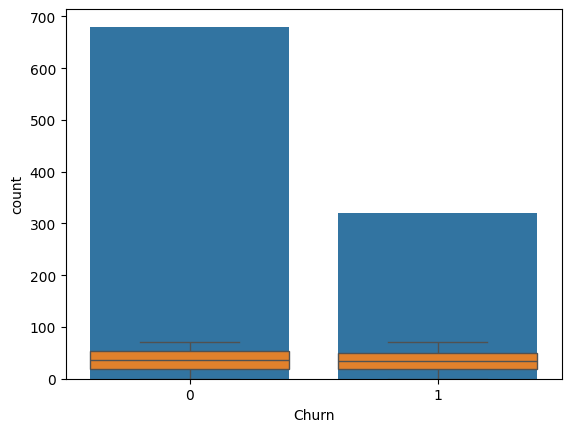

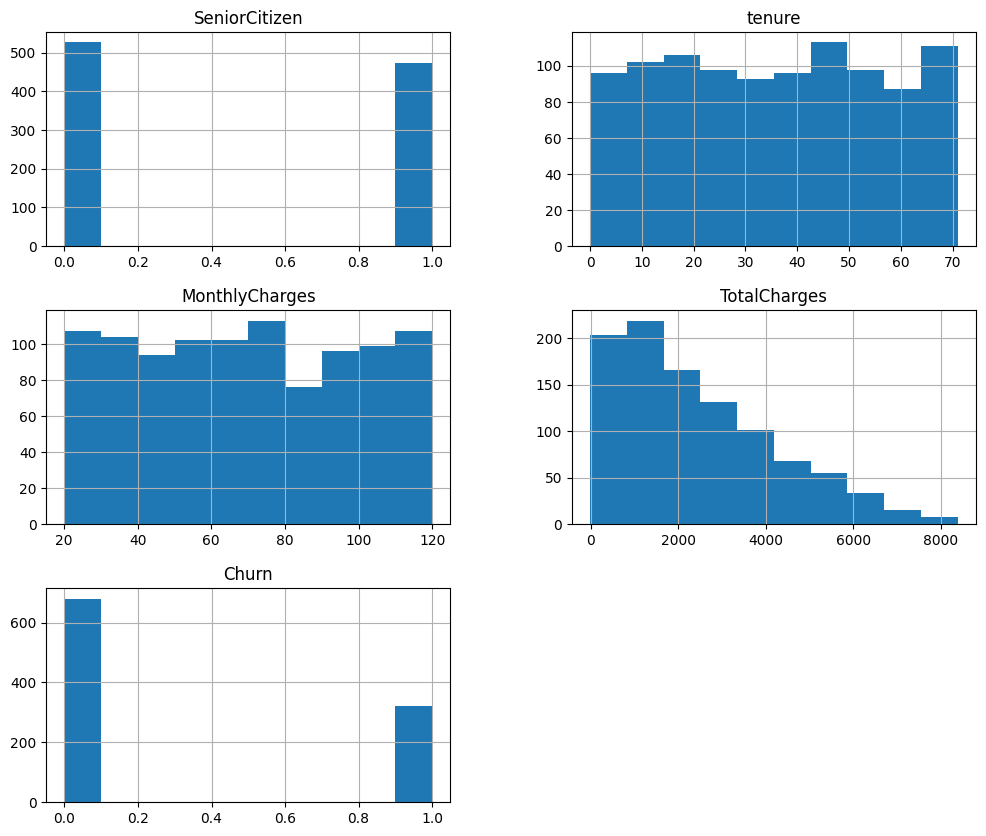

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
sns.boxplot(x='Churn', y='tenure', data=df)
df.hist(figsize=(12,10))

FEATURE ENCODING

In [8]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns


TRAIN-TEST SPLIT

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODEL TRAINING

> EVALUATE THE MODEL



In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[132  10]
 [ 52   6]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       142
           1       0.38      0.10      0.16        58

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.49       200
weighted avg       0.62      0.69      0.62       200

Accuracy: 0.69


In [13]:
import joblib
joblib.dump(model, 'churn_model.pkl')  # Save model


['churn_model.pkl']